In [1]:
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from PIL import Image
import json
from keras.models import model_from_json
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition

In [2]:
face_cascade = cv2.CascadeClassifier('../API/data/haarcascade_frontalface_default.xml')

## Face recognition function using face_recognition library

In [3]:
def openImageAndDetectFaces(path):
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image)
    try:
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        for face_location in face_locations:
            top, right, bottom, left = face_location
            face_image = image[top:bottom, left:right]
            face_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)
            pil_image = Image.fromarray(face_image)
            plt.imshow(pil_image)
            return new_size(pil_image)
    except ValueError as e:
        print(f"No face found")
        
        
def new_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=asarray(convert_from)/255
    return face

I found 1 face(s) in this photograph.


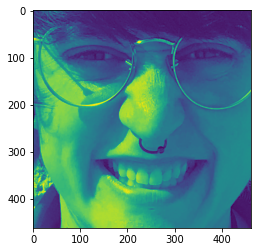

In [4]:
face = openImageAndDetectFaces("../data/ras.jpg")

## Check fer model

In [5]:
with open('../API/models/fer.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('../API/models/fer_model.h5')

I found 1 face(s) in this photograph.
Probs -> angry:0.00000 disgust:0.00000 fear:0.00000 happy:1.00000 sadness:0.00000 surprise:0.00000 neutral:0.00000


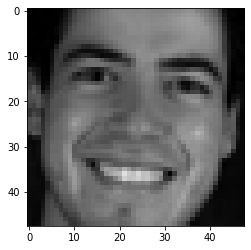

In [6]:
PIC = openImageAndDetectFaces("../data/cv.jpg")
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

## Check other model

In [7]:
with open('../API/models/model.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('../API/models/my_model.h5')

I found 1 face(s) in this photograph.
Probs -> angry:0.19981 disgust:0.01120 fear:0.09043 happy:0.14731 sadness:0.09958 surprise:0.39579 neutral:0.05589


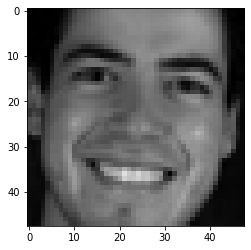

In [8]:
PIC = openImageAndDetectFaces("../data/cv.jpg")
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

## Fer model has better result. We will use that model.